# Cancer prediction

## Module imports

In [1]:
import pandas as pd
import numpy as np

# Data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

## Importing dataset

`Please upload the dataset in zip format direclty in google colab(not through google drive)`

In [2]:
!unzip /content/cancer_data.csv.zip

unzip:  cannot find or open /content/cancer_data.csv.zip, /content/cancer_data.csv.zip.zip or /content/cancer_data.csv.zip.ZIP.


In [3]:
DATASET_PATH = '/content/cancer_data.csv'
df = pd.read_csv(DATASET_PATH)

## Exploratory Data Analysis

In [4]:
df.shape

(683, 11)

In [5]:
## Checking for null values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
## Let's see what are the classes
df['Class'].unique()

array([2, 4])

2 : Non cancerous
4 : Cancerous

We are mapping 2 with 0(non cancerous) and 4 with 1(cancerous)

In [9]:
df['Class'] = df['Class'].map({2:0,4:1})

In [10]:
class_names = ['non-cancerous','cancerous']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


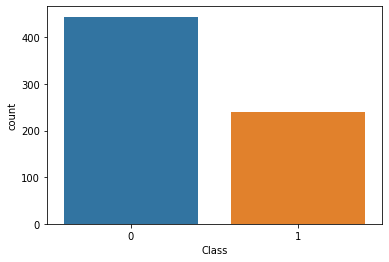

In [11]:
## Total counts of these classes 
sns.countplot(df['Class'])

These is an imbalance dataset

In [12]:
## Dropping the sample code number
df.drop('Sample code number',axis=1,inplace=True)

## Splitting the dataset into Train and test set

In [13]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.2,random_state=42)

In [14]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [15]:
print('Shape of x train : ', x_train.shape)
print('Shape of x test : ', x_test.shape)
print('Shape of y train : ', y_train.shape)
print('Shape of y test : ', y_test.shape)

Shape of x train :  (546, 9)
Shape of x test :  (137, 9)
Shape of y train :  (546,)
Shape of y test :  (137,)


## Models

In [16]:
def metrics(y_true,y_pred):
  print('f1 score :',f1_score(y_true,y_pred))
  print()
  print('accuracy :',accuracy_score(y_true,y_pred))
  print()
  print('Classification Report--')
  print(classification_report(y_true,y_pred,target_names=class_names))
  print()
  print('Confussion matrix--')
  print(confusion_matrix(y_true,y_pred))



### Naive Bias

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred = nb.predict(x_test)

In [19]:
metrics(y_test,y_pred)

f1 score : 0.9482758620689655

accuracy : 0.9562043795620438

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.96      0.96      0.96        79
    cancerous       0.95      0.95      0.95        58

     accuracy                           0.96       137
    macro avg       0.96      0.96      0.96       137
 weighted avg       0.96      0.96      0.96       137


Confussion matrix--
[[76  3]
 [ 3 55]]


### Ridge classifier

### Random forest classifier

### Logistic Regression

### k nearest neighbours

### Feed-forward-neural-network

### Visualization of results

In [20]:
def cmatrix(y_test,y_pred):
  cm=confusion_matrix(y_test,y_pred)
  group_names=['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  categories = ['Zero', 'One']
  accuracy  = np.trace(cm) / float(np.sum(cm))
  precision = cm[1,1] / sum(cm[:,1])
  recall    = cm[1,1] / sum(cm[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  stats_text = "\n\n Accuracy={:0.3f}\n Precision={:0.3f}\n Recall={:0.3f}\n F1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
  sns.heatmap(cm, xticklabels=categories,yticklabels=categories,annot=labels, fmt='', cmap='Blues')
  plt.xlabel('Predicted label'+stats_text)
  plt.ylabel('True label')
  plt.show()

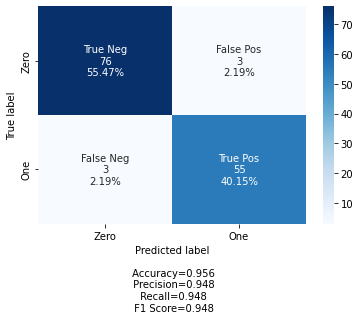

In [21]:
cmatrix(y_test,y_pred)